In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df['Category'] = df["Outcome"].astype("category")

<AxesSubplot: xlabel='Glucose', ylabel='BloodPressure'>

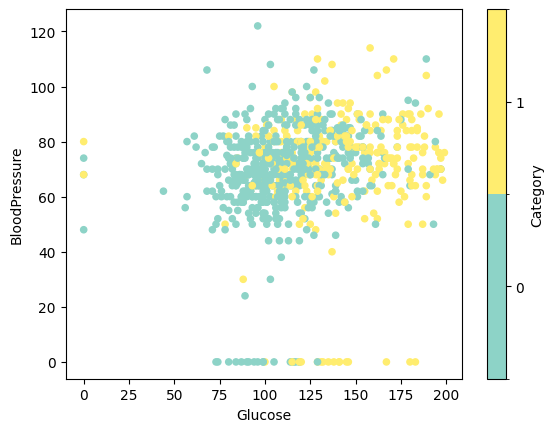

In [23]:
df.plot(x="Glucose", y="BloodPressure", kind="scatter", c="Category", cmap="Set3")

In [9]:
# train the model
from sklearn.neighbors import KNeighborsClassifier

In [10]:
features = ["Glucose","BloodPressure"]
X = df[features].values # this is the contents of the column as a numpy array
y = df["Outcome"].values

In [11]:
print(X.shape, y.shape)

(768, 2) (768,)


In [12]:
knn = KNeighborsClassifier(n_neighbors=5)

In [13]:
knn.fit(X,y)

KNeighborsClassifier()

In [14]:
X_new = np.array([[2,0.2],
                [1.4,0.3],
                [3.9,3.7],
                [4.6, 1.4]
                 ])

In [15]:
predictions = knn.predict(X_new)

In [16]:
predictions

array([0, 0, 0, 0])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

### accuracy

In [19]:
knn.score(X_test, y_test)

0.7835497835497836

In [20]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,31)

In [21]:
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

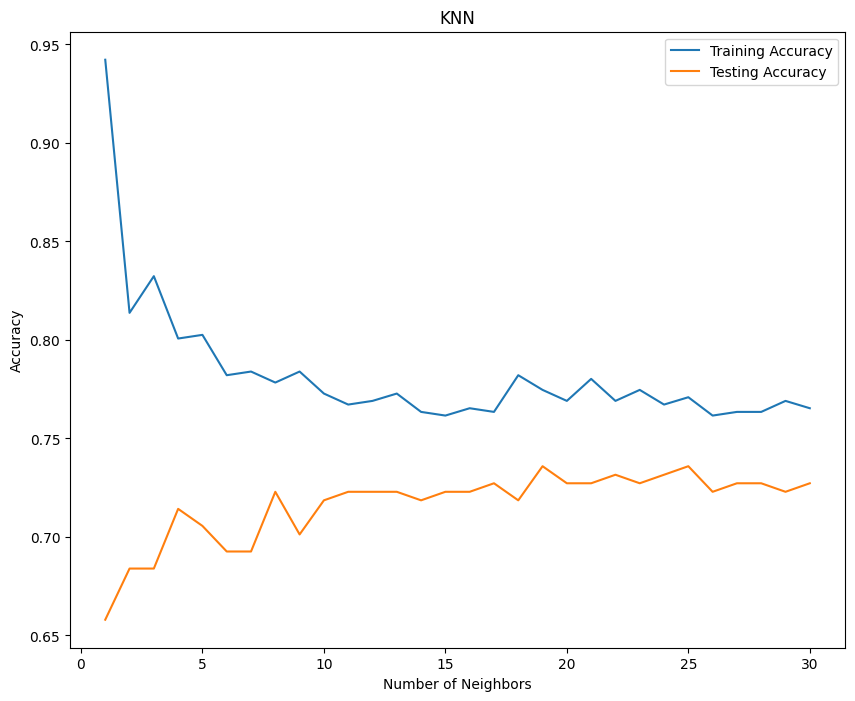

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.title("KNN")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

<AxesSubplot: xlabel='Age', ylabel='DiabetesPedigreeFunction'>

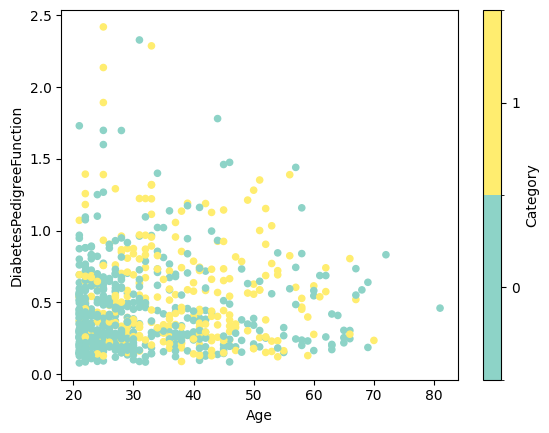

In [24]:
df.plot(x="Age", y="DiabetesPedigreeFunction", kind="scatter", c="Category", cmap="Set3")

In [26]:
features = ["Age","DiabetesPedigreeFunction"]
X = df[features].values # this is the contents of the column as a numpy array
y = df["Outcome"].values

print(X.shape, y.shape)

(768, 2) (768,)


In [27]:
knn = KNeighborsClassifier(n_neighbors=5)

In [28]:
knn.fit(X,y)

KNeighborsClassifier()

In [29]:
X_new = np.array([[2,0.2],
                [1.4,0.3],
                [3.9,3.7],
                [4.6, 1.4]
                 ])

In [31]:
predictions = knn.predict(X_new)
predictions

array([0, 0, 0, 0])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

In [33]:
knn.score(X_test, y_test)

0.7878787878787878

In [34]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,31)

In [35]:
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

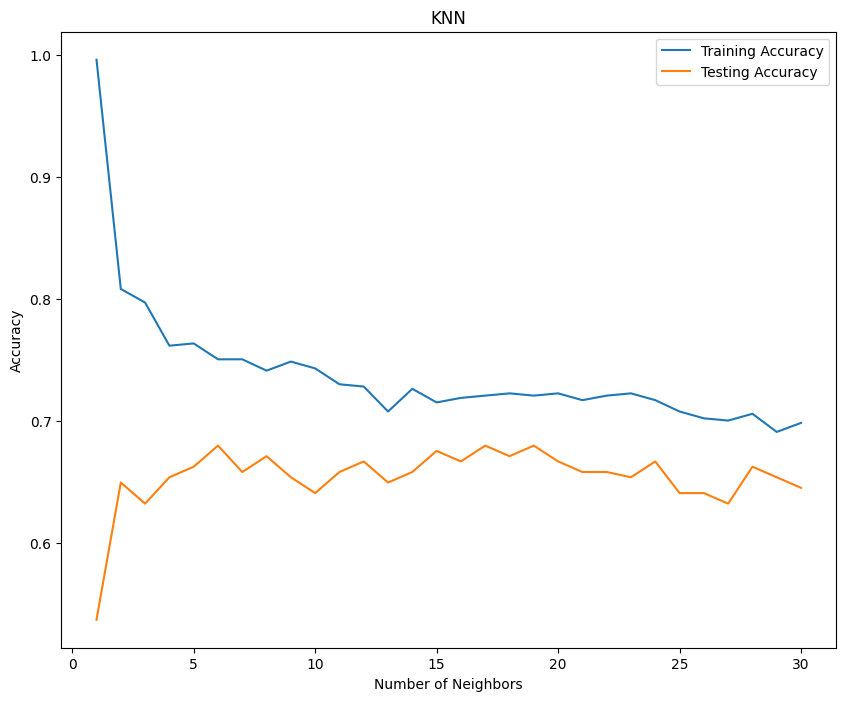

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.title("KNN")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

<AxesSubplot: xlabel='Age', ylabel='BloodPressure'>

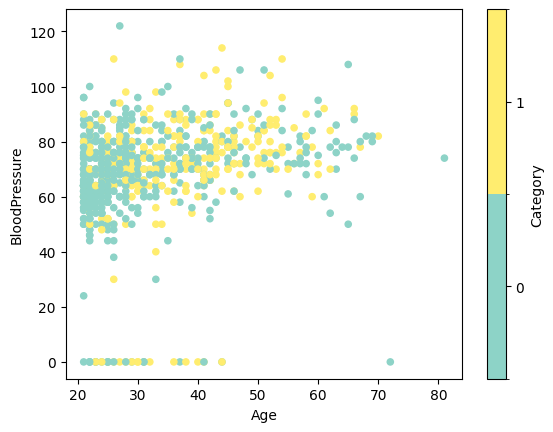

In [39]:
df.plot(x="Age", y="BloodPressure", kind="scatter", c="Category", cmap="Set3")

In [50]:
features = ["Age","BloodPressure"]
X = df[features].values # this is the contents of the column as a numpy array
y = df["Outcome"].values

print(X.shape, y.shape)

(768, 2) (768,)


In [51]:
knn = KNeighborsClassifier(n_neighbors=5)

In [52]:
knn.fit(X,y)

KNeighborsClassifier()

In [53]:
X_new = np.array([[2,0.2],
                [1.4,0.3],
                [3.9,3.7],
                [4.6, 1.4]
                 ])

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

In [55]:
knn.score(X_test, y_test)

0.7792207792207793

In [56]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,31)

In [57]:
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

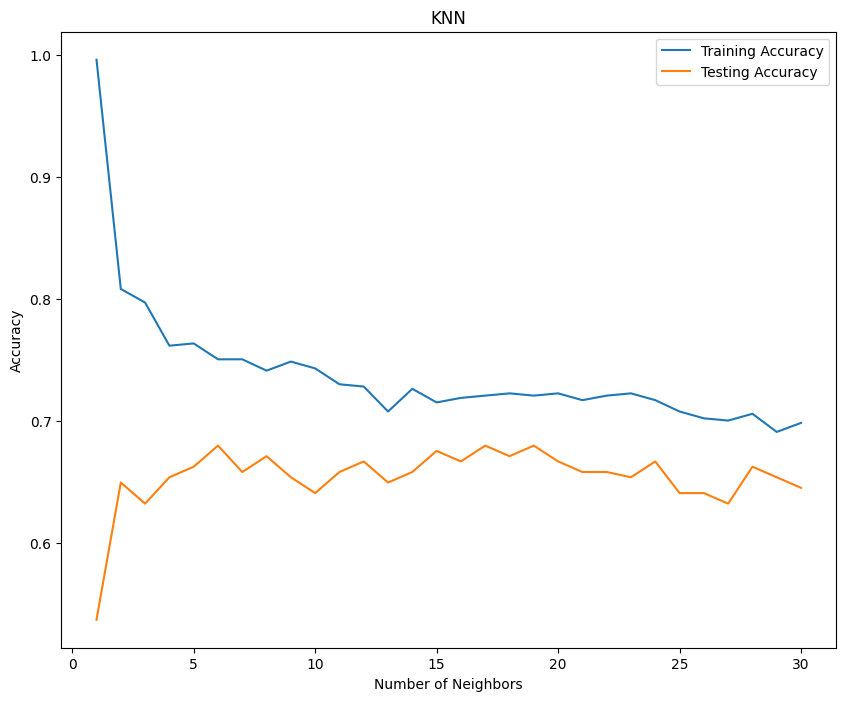

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.title("KNN")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()